<a href="https://colab.research.google.com/github/JALVARADORUIZ/Magister_BigData_UB/blob/main/M7_AI2_AlvaradoRuizJoseArmando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*PADAWAN*: 


##JOSE ARMANDO ALVARADO RUIZ

# **Tema 2. FRAMEWORKS**

**Entrega: TensorFlow y Pytorch**


# **Descripción de la tarea**

###Contexto

En la actualidad, disponemos de framework de Deep Learning, como Tensorflow o Pytorch, que facilitan mucho el desarrollo de Redes Neuronales porque ofrecen: 

Componentes básicos para desarrollar nuestros propios modelos. 

Distintos modelos de Deep Learning pre-entrenados.
Datasets para entrenar esos modelos.

En esta actividad adquiriremos un conocimiento básico de ambos framework mediante un ejercicio práctico que consiste en: 

- Cargar el dataset de imágenes CIFAR10 (del Canadian Institute for Advanced Research), disponible en ambos framework. Este dataset presenta las siguientes características: 

  Consta de 50.000 imágenes de entrenamiento y 10.000 de prueba.

  Los datasets se reparten en 10 clases: 
  - 'plane' (avión) 
  - 'car' (coche) 
  - 'bird' (pájaro) 
  - 'cat' (gato) 
  - 'deer' (ciervo) 
  - 'dog' (perro) 
  - 'frog' (rana) 
  - 'horse' (caballo) 
  - 'ship' (barco) 
  - 'truck' (camión)

  Las imágenes tiene una dimensión de 32 x 32 pixels, y son en color (3 canales). 

- Crear una Red Neuronal simple con el modo Sequential de ambos framework, compuesta por:
  - Una capa para pasar las imágenes de 2D a 1D (si es necesario).
  - Dos capas lineales con 128 y 64 nodos, seguidas de una función de activación ReLU.
  - Una capa lineal de salida que obtenga la probabilidad de cada clase.

- Entrenar ambas Redes con las opciones siguientes: 
  - Optimizador: Stochastic Gradient Descent.
  - Función de pérdida (loss): cross entropy, teniendo en cuenta que nuestra salida es categórica.
  - Tamaño de lote (batch size): 16 imágenes o Entrenar durante 100 iteraciones (epochs) o Proporción entre entrenamiento y validación: 80% - 20%.

- Evaluación de ambos modelos: 
  - Grafica las curvas de loss para datos de entrenamiento y validación en función de la iteración. 

### **Importación librerias**

In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings


%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

# TensorFlow. 

In [16]:
import tensorflow as tf

# Lectura del Dataset:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170508288/170498071 [==============================] - 13s 0us/step


In [17]:
type(x_train), type(y_train), type(x_test), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [18]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [19]:
# Transformamos las respuestas en una sola dimensión:
y_train = y_train.flatten()
y_test = y_test.flatten()

Podemos ver que los datos son del tipo numpy.narray de cuatro dimensiones, en el caso de los datos de train ya que son imagenes de 32x32 pixeles.

Veamos la distribución de clases en el Dataset:

In [20]:
clases = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

[[Text(0, 0, 'plane'),
  Text(0, 0, 'car'),
  Text(0, 0, 'bird'),
  Text(0, 0, 'cat'),
  Text(0, 0, 'deer'),
  Text(0, 0, 'dog'),
  Text(0, 0, 'frog'),
  Text(0, 0, 'horse'),
  Text(0, 0, 'ship'),
  Text(0, 0, 'truck')]]

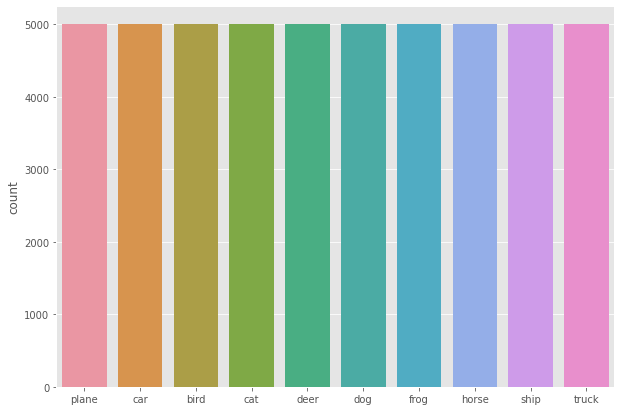

In [21]:
plt.figure(figsize=(10,7))
p = sns.countplot(y_train.flatten())
p.set(xticklabels=clases)

Vemos que cada Clase cuenta con 5000 registros, por lo que la data se encuentra totalmente balanceada.

- Reshape y Normalizacion:

Dado que los valores en nuestro conjunto de datos x_train son imágenes de 32x32 y de 3 canales, nuestra forma de entrada debe especificarse para que nuestro modelo sepa lo que se está ingresando.

Además, para nuestro dataset CIFAR10, queremos que cada valor esté entre 0,0 y 1,0. Como todos los valores originalmente caen dentro del rango de 0.0-255.0, vamos a dividir por 255.0

In [22]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
x_train = x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)
x_test = x_test / 255.0

Las etiquetas para el conjunto de datos de entrenamiento y prueba son actualmente categóricas y no son continuas. Para incluir conjuntos de datos categóricos en nuestro modelo, nuestras etiquetas deben convertirse en codificaciones one-hot.

In [23]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

- Crear una Red Neuronal simple con el modo Sequential

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
_________________________________________________________________


In [25]:
opt = tf.keras.optimizers.SGD()
model.compile(optimizer = opt,
              loss ='categorical_crossentropy',
              metrics = ['accuracy','mse'])

In [26]:
history = model.fit(x_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100
2500/2500 [==============================] - 9s 3ms/step - loss: 1.8924 - accuracy: 0.3163 - mse: 0.0798 - val_loss: 1.7924 - val_accuracy: 0.3527 - val_mse: 0.0767
Epoch 2/100
2500/2500 [==============================] - 7s 3ms/step - loss: 1.7142 - accuracy: 0.3878 - mse: 0.0744 - val_loss: 1.7053 - val_accuracy: 0.3983 - val_mse: 0.0741
Epoch 3/100
2500/2500 [==============================] - 7s 3ms/step - loss: 1.6359 - accuracy: 0.4160 - mse: 0.0718 - val_loss: 1.6598 - val_accuracy: 0.4032 - val_mse: 0.0727
Epoch 4/100
2500/2500 [==============================] - 7s 3ms/step - loss: 1.5816 - accuracy: 0.4372 - mse: 0.0699 - val_loss: 1.6054 - val_accuracy: 0.4329 - val_mse: 0.0704
Epoch 5/100
2500/2500 [==============================] - 7s 3ms/step - loss: 1.5363 - accuracy: 0.4536 - mse: 0.0684 - val_loss: 1.5966 - val_accuracy: 0.4366 - val_mse: 0.0706
Epoch 6/100
2500/2500 [==============================] - 7s 3ms/step - loss: 1.5036 - accuracy: 0.4646 - mse: 0.067

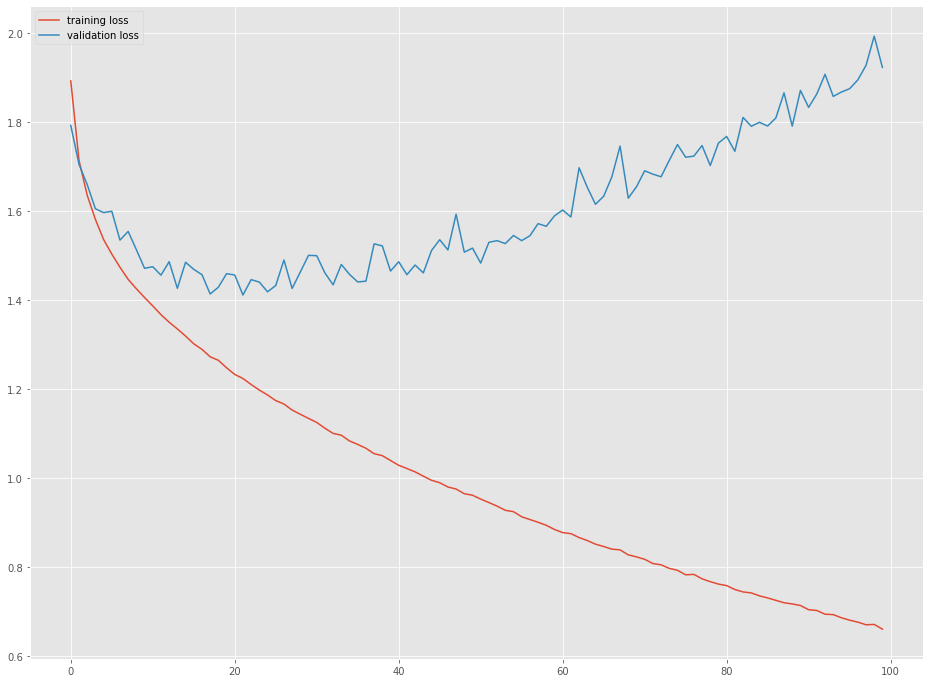

In [27]:
plt.style.use('ggplot')
plt.figure(figsize=(16,12))
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()

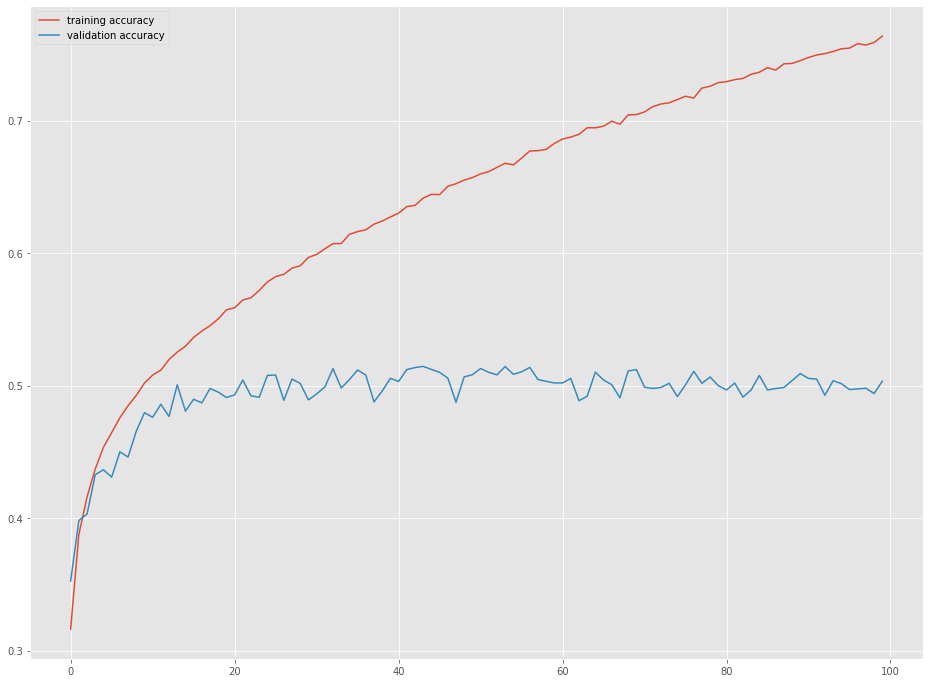

In [28]:
plt.style.use('ggplot')
plt.figure(figsize=(16,12))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()

In [29]:
test_loss, test_acc, test_mse = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.8925 - accuracy: 0.5000 - mse: 0.0712


In [30]:
# Predecir los valores del conjunto de datos de validación
y_pred = model.predict(x_test)
# Convertir clases de predicciones en vectores calientes
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convierta las observaciones de validación en un vector one hot
y_true = np.argmax(y_test,axis = 1)
# Matriz de Confusion
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

[[Text(0, 0.5, 'plane'),
  Text(0, 1.5, 'car'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')],
 [Text(0.5, 0, 'plane'),
  Text(1.5, 0, 'car'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')]]

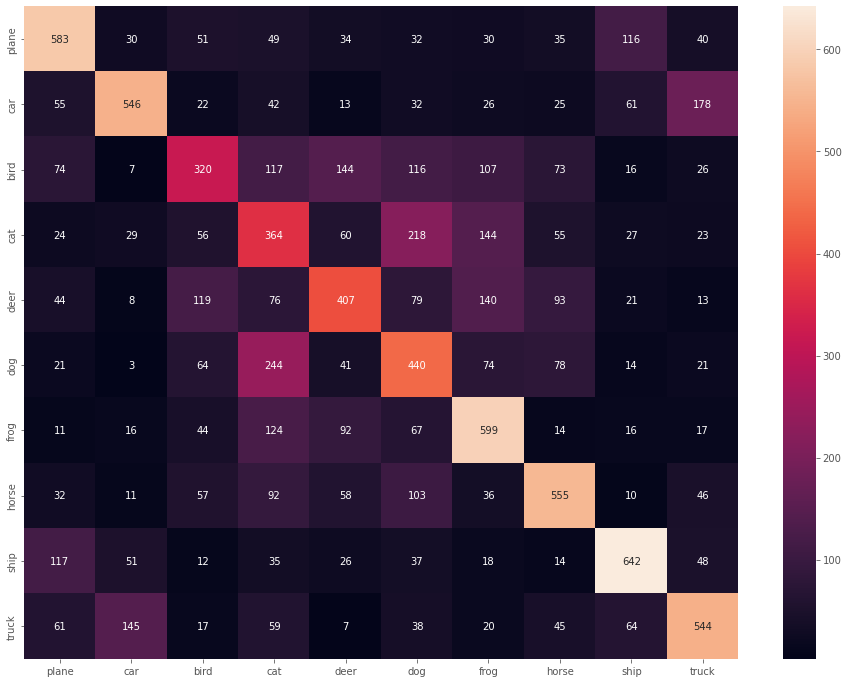

In [31]:
plt.figure(figsize=(16,12))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=clases, yticklabels=clases)

# PyTorch

In [86]:
# Importación de librerias

import torch 
import torchvision 
from torch import nn 
from torch import optim
import torch.nn.functional as F 

from torchvision import datasets, transforms, models 
                                                     
from torch.utils.data import * 
from torch.utils.data.sampler import SubsetRandomSampler


In [87]:
# Comprobamos si existe GPU disponible:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [88]:
print(device)

cuda:0


In [89]:
# Definimos función para realizar el split en datos de train, validation y test

def split_image_data(train_data,
                     test_data=None,
                     batch_size=16,
                     num_workers=0,
                     valid_size=0.2,
                     sampler=SubsetRandomSampler):
    
    num_train = len(train_data)
    indices = list(range(num_train))
    np.random.shuffle(indices)
    split = int(np.floor(valid_size * num_train))
    train_idx, valid_idx = indices[split:], indices[:split]
    train_sampler = sampler(train_idx)
    valid_sampler = sampler(valid_idx)
    if test_data is not None:
        test_loader = DataLoader(test_data, batch_size=batch_size,
        num_workers=num_workers)
    else:
        train_idx, test_idx = train_idx[split:],train_idx[:split]
        train_sampler = sampler(train_idx)
        test_sampler = sampler(test_idx)
        
        test_loader = torch.utils.data.DataLoader(train_data, 
                                                  batch_size=batch_size,
                                                  sampler=test_sampler,
                                                  num_workers=num_workers)

    train_loader = torch.utils.data.DataLoader(train_data,
                                               batch_size=batch_size,
                                               sampler=train_sampler,
                                               num_workers=num_workers)
    
    valid_loader = torch.utils.data.DataLoader(train_data,
                                               batch_size=batch_size, 
                                               sampler=valid_sampler,
                                               num_workers=num_workers)
    
    return train_loader,valid_loader,test_loader

In [90]:
batch_size = 16

# Transformaciones necesarias: La imagen la definimos en 32x32 (tamaño original), lo convertimos en Tensores y normalizamos 
# tomando el promedio de las medias acumuladas y los valores estándares.

transform = transforms.Compose([transforms.Resize((32,32)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
                               ])

training_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testing_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

training_loader, validation_loader, testing_loader = split_image_data(training_dataset,testing_dataset,batch_size=batch_size)



Files already downloaded and verified
Files already downloaded and verified


In [91]:
# Tamaños batches de cada uno de los DataLoader
len(training_loader),len(testing_loader),len(validation_loader)

(2500, 625, 625)

In [92]:
# Necesitamos convertir las imágenes en matrices numpy ya que los tensores no son compatibles con matplotlib.
def im_convert(tensor):  
  image = tensor.cpu().clone().detach().numpy() # Este proceso ocurrirá en una CPU normal.
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.4915, 0.4823, 0.4468)) + np.array((0.2470, 0.2435, 0.2616))
  image = image.clip(0, 1)
  return image

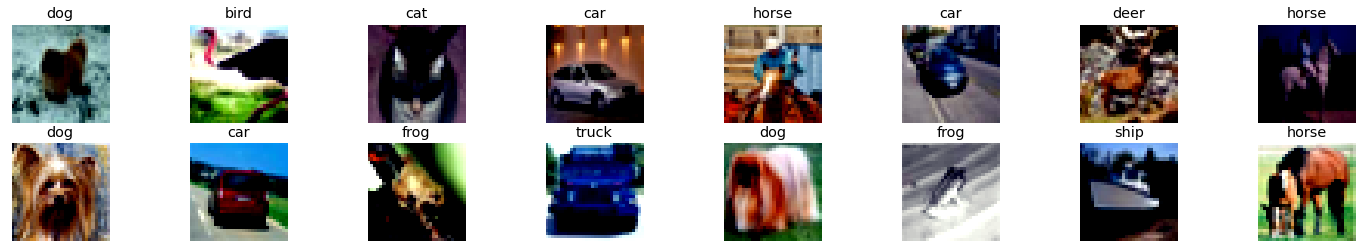

In [93]:
# Iteramos el lote de imágenes a mostrar
# convertimos nuestro train_dataloader en iterable para que podamos recorrerlo.
dataiter = iter(training_loader) 
images, labels = dataiter.next() 
fig = plt.figure(figsize=(25, 4)) 

# Mostramos 16 imágenes de nuestro train_dataset
for idx in np.arange(16):
  ax = fig.add_subplot(2, 8, idx+1, xticks=[], yticks=[]) 
  #convirtiendo a matriz numpy como lo necesita plt.
  plt.imshow(im_convert(images[idx])) 
  ax.set_title(clases[labels[idx].item()])

In [94]:
# Generamos nuestro modelo con las especificaciones solicitadas:

model_pt = nn.Sequential(nn.Flatten(),
                        nn.Linear(3072, 128),
                        nn.ReLU(),
                        nn.Linear(128, 64),
                        nn.ReLU(),
                        nn.Linear(64, 10))

print(model_pt)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=3072, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=64, bias=True)
  (4): ReLU()
  (5): Linear(in_features=64, out_features=10, bias=True)
)


In [95]:
# Definimos nuestro optimizador SGD
optimizer = optim.SGD(model_pt.parameters(),lr=0.0001,momentum=0.9)

# Nuestra función de perdida, optamos por CrossEntropyLoss() sin utilizar una capa no lineal SoftMax
criterion = nn.CrossEntropyLoss()
# Otra opción es que la última capa de tu modelo sea Linear, sin softmax, y usar CrossEntropyLoss.

In [96]:
# Ejecuta nuestro modelo en cuda GPU para obtener resultados más rápidos
model_pt.to(device) 

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=3072, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=64, bias=True)
  (4): ReLU()
  (5): Linear(in_features=64, out_features=10, bias=True)
)

In [97]:
num_epoch = 100

train_losses = []
valid_losses = []


for epoch in range(1,num_epoch+1):
  train_loss=0.0
  valid_loss=0.0

  model_pt.train()
  for img,lbl in training_loader:
    img=img.cuda()
    lbl=lbl.cuda()

    optimizer.zero_grad()
    predict=model_pt(img)

    _, lbl_pred = torch.max(predict.data, 1)
    loss=criterion(predict,lbl)
    loss.backward()
    optimizer.step()
    train_loss+=loss.item()*img.size(0)

  
  model_pt.eval()

  correct_val = 0
  total_val = 0

  # Inicializamos para contar predicciones para cada clase
  correct_pred = {classname: 0 for classname in clases}
  total_pred = {classname: 0 for classname in clases}

  for img,lbl in validation_loader:
    img=img.cuda()
    lbl=lbl.cuda()

    predict=model_pt(img)
    _, lbl_pred = torch.max(predict.data, 1)

    loss=criterion(predict,lbl)

    valid_loss+=loss.item()*img.size(0)

    total_val += lbl.size(0)
    correct_val += (lbl_pred == lbl).sum().item()


    # recopilar las predicciones correctas para cada clase
    for label, prediction in zip(lbl, lbl_pred):
      if label == prediction:
        correct_pred[clases[label]] += 1
      total_pred[clases[label]] += 1


  train_loss=train_loss/len(training_loader.sampler) 
  valid_loss=valid_loss/len(validation_loader.sampler)

  train_losses.append(train_loss)
  valid_losses.append(valid_loss)

  

  print('Epoch:{} Train Loss:{:.4f} valid Loss:{:.4f}'.format(epoch,train_loss,valid_loss)) 


Epoch:1 Train Loss:2.1224 valid Loss:1.9794
Epoch:2 Train Loss:1.8833 valid Loss:1.8127
Epoch:3 Train Loss:1.7552 valid Loss:1.7257
Epoch:4 Train Loss:1.6788 valid Loss:1.6707
Epoch:5 Train Loss:1.6258 valid Loss:1.6272
Epoch:6 Train Loss:1.5838 valid Loss:1.5993
Epoch:7 Train Loss:1.5491 valid Loss:1.5718
Epoch:8 Train Loss:1.5173 valid Loss:1.5516
Epoch:9 Train Loss:1.4878 valid Loss:1.5342
Epoch:10 Train Loss:1.4625 valid Loss:1.5179
Epoch:11 Train Loss:1.4378 valid Loss:1.5034
Epoch:12 Train Loss:1.4138 valid Loss:1.4889
Epoch:13 Train Loss:1.3919 valid Loss:1.4747
Epoch:14 Train Loss:1.3698 valid Loss:1.4647
Epoch:15 Train Loss:1.3485 valid Loss:1.4510
Epoch:16 Train Loss:1.3286 valid Loss:1.4520
Epoch:17 Train Loss:1.3080 valid Loss:1.4343
Epoch:18 Train Loss:1.2893 valid Loss:1.4284
Epoch:19 Train Loss:1.2702 valid Loss:1.4227
Epoch:20 Train Loss:1.2516 valid Loss:1.4184
Epoch:21 Train Loss:1.2349 valid Loss:1.4145
Epoch:22 Train Loss:1.2178 valid Loss:1.4108
Epoch:23 Train Loss

In [98]:
print(f'Accuracy del modelo sobre el dataset de validación: {100 * correct_val / total_val}%')

Accuracy del modelo sobre el dataset de validación: 49.21%
Accuracy for class: plane is 52.9 %
Accuracy for class: car   is 53.9 %
Accuracy for class: bird  is 39.3 %
Accuracy for class: cat   is 35.7 %
Accuracy for class: deer  is 43.4 %
Accuracy for class: dog   is 42.2 %
Accuracy for class: frog  is 51.0 %
Accuracy for class: horse is 53.4 %
Accuracy for class: ship  is 62.7 %
Accuracy for class: truck is 57.5 %


In [100]:
# Accuracy para cada Clase
for classname, correct_count in correct_pred.items():
  accuracy = 100 * float(correct_count) / total_pred[classname]
  print(f'Accuracy para clase: {classname:5s} is {accuracy:.1f} %')

Accuracy para clase: plane is 52.9 %
Accuracy para clase: car   is 53.9 %
Accuracy para clase: bird  is 39.3 %
Accuracy para clase: cat   is 35.7 %
Accuracy para clase: deer  is 43.4 %
Accuracy para clase: dog   is 42.2 %
Accuracy para clase: frog  is 51.0 %
Accuracy para clase: horse is 53.4 %
Accuracy para clase: ship  is 62.7 %
Accuracy para clase: truck is 57.5 %


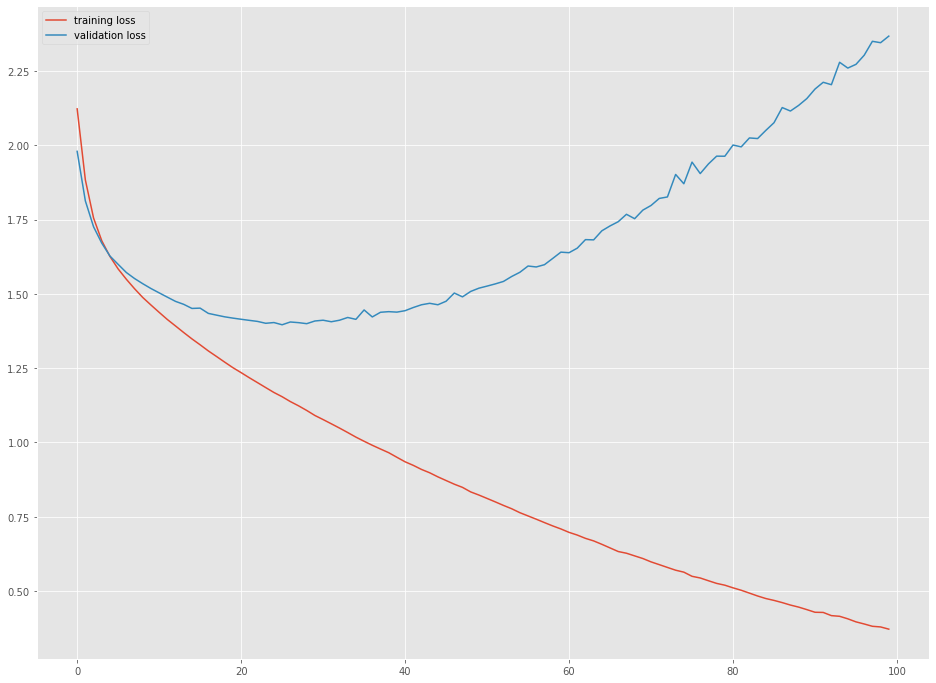

In [99]:
plt.style.use('ggplot')
plt.figure(figsize=(16,12))
plt.plot(train_losses, label='training loss')
plt.plot(valid_losses, label='validation loss')
plt.legend()

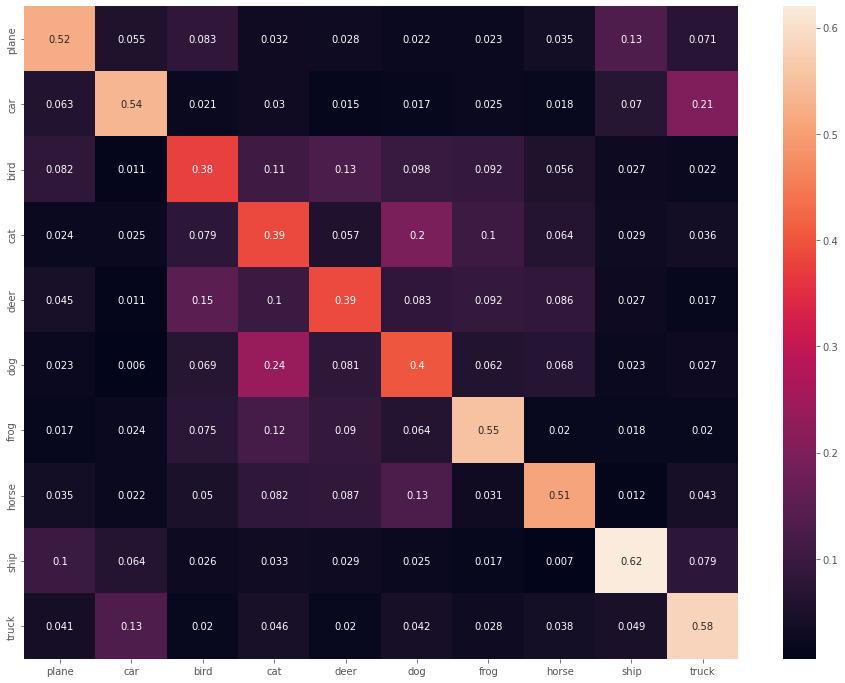

In [103]:
# Matriz de Confusión para los Datos de Test:

from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd


y_pred = []
y_true = []

# iterate over test data
for inputs, labels in testing_loader:
        inputs = inputs.cuda()
        labels = labels.cuda()
        output = model_pt(inputs)

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) 
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) 



# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in clases],
                     columns = [i for i in clases])
plt.figure(figsize = (16,12))
sn.heatmap(df_cm, annot=True)


## CONCLUSIONES

El objetivo de esta entrega era la utilización de estos dos framework de Deep Learning, como son TensorFlow y PyTorch mediante el modo secuencial.

El enfoque fue crear una red neuronal con Capas Lineales, lo que para este conjunto de datos no fue lo más preciso en cuanto a la metrica Accuracy, ya que en ambos Framework obtuvimos un Accucary cercano a 50% para los datos de validación. Esto se puede explicar por el tamaño (32x32) de las imagenes, ya que la mayoría de los modelos de Deep Learning requieren que los datos tengan un tamaño de al menos 224x224. El motivo de esta limitación es que estos modelos están diseñados con una gran cantidad de capas de convolución y agrupación, seguidas finalmente por una capa (lineal) completamente conectada al final para generar la salida de clasificación. Si la imagen de entrada ya era demasiado pequeña (como imágenes CIFAR-10 de 32x32 en nuestro caso), sería demasiado pequeña para que la red produjera una salida significativa. Por lo tanto, estos modelos nos restringen a obtener mejores resultados.

Si vemos los gráficos de perdida de los datos Training y Validation, podemos identificar Overfitting, recordemos que este concepto se aplica cuando la red neuronal aprende mucho sobre los datos de entrenamiento pero tiene un desempeño pobre en los datos de validación o en datos que nunca ha visto. 